In [27]:
import setuptools.dist
import tensorflow as tf
from tensorflow.keras import datasets, layers # type: ignore
import matplotlib.pyplot as plt
import numpy as np

2.17.0


In [28]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

shuffled_train = np.random.permutation(len(x_train))
x_train = x_train[shuffled_train]
y_train = y_train[shuffled_train]

# Shuffle x_test and y_test together
shuffled_test = np.random.permutation(len(x_test))
x_test = x_test[shuffled_test]
y_test = y_test[shuffled_test]

In [29]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
x_test.shape

(10000, 28, 28)

In [32]:
model = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(10, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(20, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(rate=0.5),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(10)
])

In [33]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8038 - loss: 0.5890
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9603 - loss: 0.1287
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9691 - loss: 0.0966
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9729 - loss: 0.0882
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9766 - loss: 0.0722
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9797 - loss: 0.0653
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9794 - loss: 0.0631
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0.0598
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9829 - loss: 0.0536
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9827 - loss: 0.0507


In [34]:
accuracy = model.evaluate(x_test,  y_test)
print(f"Dev Accuracy: {accuracy[1]:.4f}, Dev Loss: {accuracy[0]:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9906 - loss: 0.0277
Dev Accuracy: 0.9916, Dev Loss: 0.0243


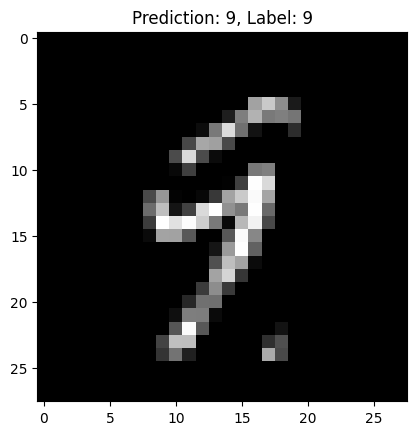

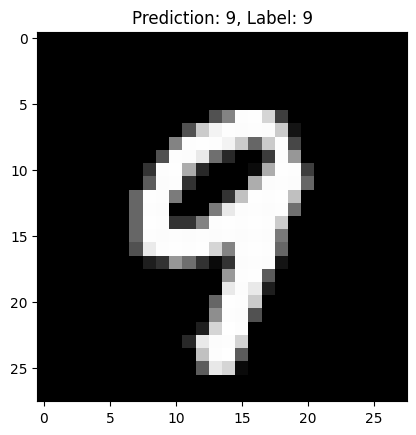

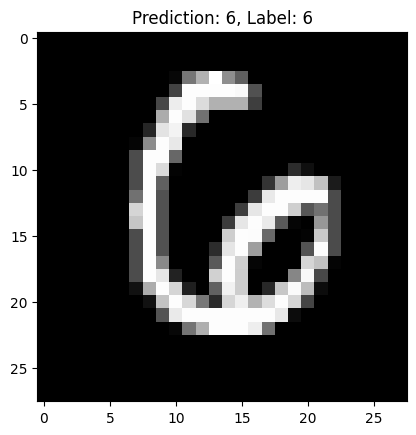

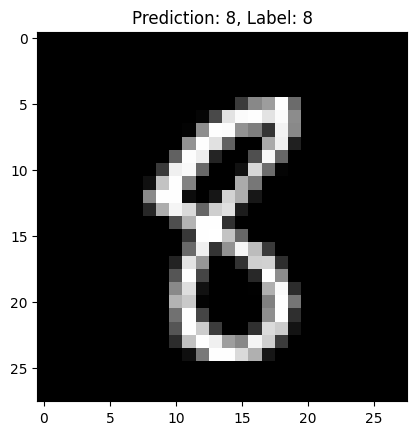

In [35]:
def test_prediction(model, test_data, target_data, idx):
    data = test_data[idx]
    target = target_data[idx]
    data = np.expand_dims(data, axis=0)
    data = data.astype(np.float32)

    output = model(data)
    prediction = np.argmax(output.numpy(), axis=1)[0]
    image = data.squeeze(0)

    plt.figure()
    plt.imshow(image, cmap="gray", interpolation='nearest')
    plt.title(f"Prediction: {prediction}, Label: {target}")
    plt.show()

total_tests = 4

for i in range(total_tests):
    test_prediction(model, x_test, y_test, i)
